## Abfrage und Aktualisierung der Strahlenwerte


#### Verbindung zu unserem GIS herstellen:

In [1]:
# Verbindung zum GIS aufbauen
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.7/site-packages/arcgis/gis/__init__.py:575: UserWarning:

You are logged on as b.mueller with an administrator role, proceed with caution.



#### Import der benötigten Bibliotheken

In [2]:
# Feature Modul zur Bearbeitung unseres FeatureLayers
from arcgis.features import GeoAccessor, FeatureSet
# Pandas zur Verarbeitung unserer Daten
import pandas as pd
# Urllib zur Abfrage der API und JSON
import urllib.request, json 

### Abfrage der API

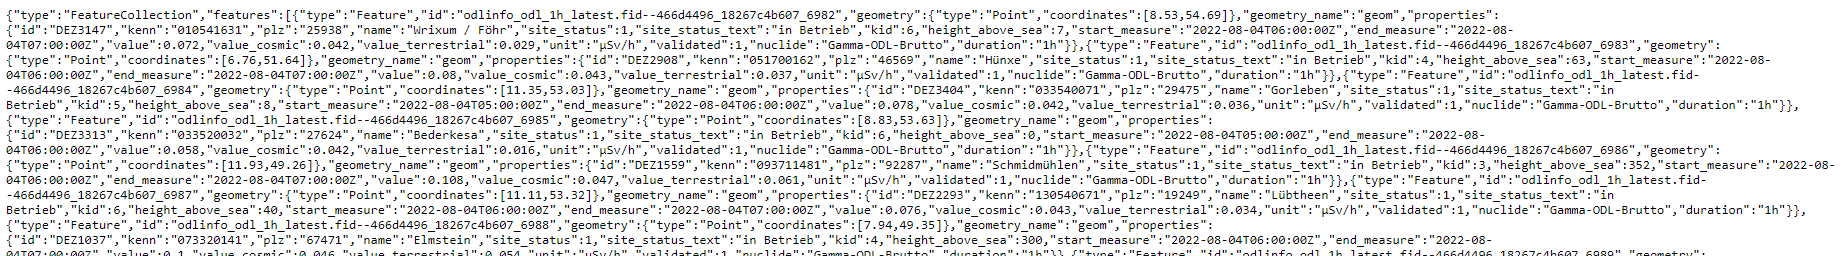

In [4]:
# URL zu den Daten
url_ = 'https://www.imis.bfs.de/ogc/opendata/ows?service=WFS&version=1.1.0&request=GetFeature&typeName=opendata:odlinfo_odl_1h_latest&outputFormat=application/json'

In [5]:
# JSON öffnen
with urllib.request.urlopen(url_) as url:
    data = json.loads(url.read().decode())

https://developers.arcgis.com/python/api-reference/

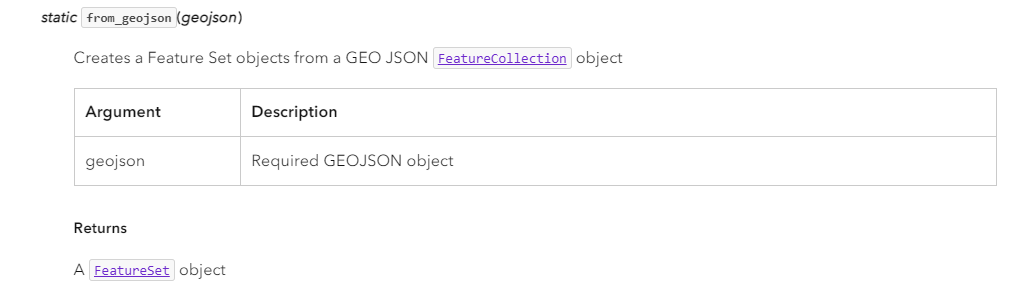

In [6]:
# FeatureSet aus der GeoJSON erstellen
featureset = FeatureSet.from_geojson(data)

/opt/conda/lib/python3.7/site-packages/arcgis/features/feature.py:998: UserWarning:

crs has been deprecated and will be ignored. Please see: https://tools.ietf.org/html/rfc7946#section-4 for more information.



In [7]:
featureset

<FeatureSet> 1713 features

In [8]:
# FeatureSet in SpatialDataFrame umwandeln
sdf = featureset.sdf

### Visualisieren unserer Daten

In [9]:
sdf

,id,kenn,plz,name,site_status,site_status_text,kid,height_above_sea,start_measure,end_measure,value,value_cosmic,value_terrestrial,unit,validated,nuclide,duration,OBJECTID,SHAPE
0,DEZ3237,020040001,22335,Hamburg-Fuhlsbüttel,1,in Betrieb,6,25,2022-08-08T11:00:00Z,2022-08-08T12:00:00Z,0.064,0.042,0.022,µSv/h,1.0,Gamma-ODL-Brutto,1h,1,"{""x"": 9.99, ""y"": 53.63, ""spatialReference"": {""..."
1,DEZ2883,032560362,31613,Wietzen-Holte,1,in Betrieb,5,69,2022-08-08T11:00:00Z,2022-08-08T12:00:00Z,0.070,0.043,0.027,µSv/h,1.0,Gamma-ODL-Brutto,1h,2,"{""x"": 9.05, ""y"": 52.69, ""spatialReference"": {""..."
2,DEZ3478,034590101,49593,Bersenbrück OT Ahausen,1,in Betrieb,4,35,2022-08-08T11:00:00Z,2022-08-08T12:00:00Z,0.059,0.043,0.017,µSv/h,1.0,Gamma-ODL-Brutto,1h,3,"{""x"": 7.9, ""y"": 52.57, ""spatialReference"": {""w..."
3,DEZ0242,032510261,27327,Martfeld,1,in Betrieb,5,19,2022-08-08T11:00:00Z,2022-08-08T12:00:00Z,0.062,0.042,0.019,µSv/h,1.0,Gamma-ODL-Brutto,1h,4,"{""x"": 9.06, ""y"": 52.88, ""spatialReference"": {""..."
4,DEZ1073,073400571,76848,Wilgartswiesen,1,in Betrieb,1,203,2022-08-08T10:00:00Z,2022-08-08T11:00:00Z,0.100,0.045,0.056,µSv/h,1.0,Gamma-ODL-Brutto,1h,5,"{""x"": 7.9, ""y"": 49.22, ""spatialReference"": {""w..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,DEZ0487,034570141,26802,Moormerland-Oldersum,1,in Betrieb,5,3,2022-08-08T11:00:00Z,2022-08-08T12:00:00Z,0.074,0.042,0.032,µSv/h,1.0,Gamma-ODL-Brutto,1h,1709,"{""x"": 7.34, ""y"": 53.33, ""spatialReference"": {""..."
1709,DEZ2535,143740901,04838,Eilenburg,1,in Betrieb,2,116,2022-08-08T11:00:00Z,2022-08-08T12:00:00Z,0.104,0.044,0.060,µSv/h,1.0,Gamma-ODL-Brutto,1h,1710,"{""x"": 12.63, ""y"": 51.45, ""spatialReference"": {..."
1710,DEZ2708,141712401,09484,Oberwiesenthal,2,defekt,2,1214,None,None,NaN,NaN,NaN,µSv/h,NaN,Gamma-ODL-Brutto,1h,1711,"{""x"": 12.95, ""y"": 50.43, ""spatialReference"": {..."
1711,DEZ2689,130580521,23942,Kalkhorst,1,in Betrieb,6,25,2022-08-08T11:00:00Z,2022-08-08T12:00:00Z,0.091,0.042,0.048,µSv/h,1.0,Gamma-ODL-Brutto,1h,1712,"{""x"": 11.04, ""y"": 53.97, ""spatialReference"": {..."


In [12]:
karte = gis.map('Deutschland')
karte

MapView(layout=Layout(height='400px', width='100%'))

In [13]:
# Zeichnen unserer Daten
sdf.spatial.plot(karte, renderer_type  = 's', symbol_type='simple')

True

### Modifizieren der Daten

In [7]:
# Messdaten in Datentype 'datetime' umwandeln
sdf['start_measure'] =  pd.to_datetime(sdf['start_measure'])
sdf['end_measure'] =  pd.to_datetime(sdf['end_measure'])

In [8]:
# Die ObjectID brauchen wir nicht um unseren Feature Layer zu aktualisieren
sdf.drop('OBJECTID', inplace=True, axis=1)

In [9]:
# Zeilennamen umbenennen
sdf.columns = ['id', 'kenn', 'plz', 'name', 'site_statu', 'site_text', 'kid',
       'height', 'f_measure', 'l_measure', 'value',
       'value_cos', 'value_te', 'unit', 'validated', 'nuclide',
       'duration', 'SHAPE']

### Update unseres Layers

Abfrage des Layers

<Item title:"Radioaktivität Deutschland" type:Feature Layer Collection owner:b.mueller>
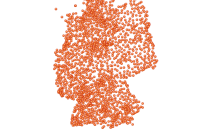

In [28]:
# Abfrage des FeatureServices
target_service = gis.content.get("390bfded155a46048ee187edad0928cf")
target_service

In [29]:
# Zugriff auf den zu updatenden Layer
target_item = target_service.layers[0]
target_item

<FeatureLayer url:"https://services.arcgis.com/OLiydejKCZTGhvWg/arcgis/rest/services/ae718d/FeatureServer/0">

In [32]:

#  aus Target-Item wird ein FeautureSet erstellt, was die Basis fuer das Update bildet
try:
    # Aus dem Layer ein FeatureSet erstellen
    target_featureset = target_item.query(where='1=1', out_fields='FID,id',return_geometry=False)
    print(target_featureset.sdf)
except Exception as e:
    print(e)
    print('Query fehlgeschlagen.')

       FID       id SHAPE
0        1  DEZ1021  None
1        2  DEZ3561  None
2        3  DEZ0739  None
3        4  DEZ0957  None
4        5  DEZ3399  None
...    ...      ...   ...
1721  1722  DEZ0239  None
1722  1723  DEZ3058  None
1723  1724  DEZ2314  None
1724  1725  DEZ3568  None
1725  1726  DEZ3569  None

[1726 rows x 3 columns]


In [33]:
try:
    # Zusammenführen des FeatureService mit den aktuellen Daten
    sdf_merge = pd.merge(sdf,target_featureset.sdf,on='id',how='left')
    # Wenn OBJECTID im DF nicht vorhanden, wird das jeweilige Feautre dem FeartureSet hinzugefuegt
    sdf_add = sdf_merge[sdf_merge['FID'].isnull() == True]
    # Wenn die Objectid vorhanden ist, ist der Sensor der API bereits im Featureset enthalten, und muss nur geupdated werden
    sdf_update = sdf_merge[sdf_merge['FID'].isnull() == False]
except:
    # pass (wegen verdoppeln)
    sdf_add = sdf

In [34]:
sdf_merge

,id,kenn,plz,name,site_status,site_status_text,kid,height_above_sea,start_measure,end_measure,...,value_cosmic,value_terrestrial,unit,validated,nuclide,duration,OBJECTID,SHAPE_x,FID,SHAPE_y
0,DEZ3028,010540192,25821,Bredstedt,1,in Betrieb,6,25,2022-08-04T09:00:00Z,2022-08-04T10:00:00Z,...,0.042,0.028,µSv/h,1.0,Gamma-ODL-Brutto,1h,1,"{'x': 8.97, 'y': 54.61, 'spatialReference': {'...",50,None
1,DEZ2874,142840101,02953,Bad Muskau OT Köbeln,1,in Betrieb,2,127,2022-08-04T09:00:00Z,2022-08-04T10:00:00Z,...,0.044,0.029,µSv/h,1.0,Gamma-ODL-Brutto,1h,2,"{'x': 14.7, 'y': 51.57, 'spatialReference': {'...",374,None
2,DEZ1864,097791541,86744,Hainsfarth,1,in Betrieb,3,414,2022-08-04T09:00:00Z,2022-08-04T10:00:00Z,...,0.048,0.068,µSv/h,1.0,Gamma-ODL-Brutto,1h,3,"{'x': 10.61, 'y': 48.96, 'spatialReference': {...",888,None
3,DEZ3253,053740202,51789,Lindlar,1,in Betrieb,4,216,2022-08-04T09:00:00Z,2022-08-04T10:00:00Z,...,0.045,0.068,µSv/h,1.0,Gamma-ODL-Brutto,1h,4,"{'x': 7.35, 'y': 51.01, 'spatialReference': {'...",308,None
4,DEZ0543,051200001,42897,Remscheid-Lennep,1,in Betrieb,4,300,2022-08-04T09:00:00Z,2022-08-04T10:00:00Z,...,0.046,0.070,µSv/h,1.0,Gamma-ODL-Brutto,1h,5,"{'x': 7.27, 'y': 51.19, 'spatialReference': {'...",799,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,DEZ3175,152660512,06542,Wolferstedt,2,defekt,2,150,None,None,...,NaN,NaN,µSv/h,NaN,Gamma-ODL-Brutto,1h,1715,"{'x': 11.44, 'y': 51.42, 'spatialReference': {...",1377,None
1715,DEZ3499,091831282,84453,Mühldorf am Inn,1,in Betrieb,3,406,2022-08-04T09:00:00Z,2022-08-04T10:00:00Z,...,0.048,0.063,µSv/h,1.0,Gamma-ODL-Brutto,1h,1716,"{'x': 12.5, 'y': 48.28, 'spatialReference': {'...",595,None
1716,DEZ2887,153700291,39638,Gardelegen,1,in Betrieb,2,46,2022-08-04T09:00:00Z,2022-08-04T10:00:00Z,...,0.043,0.030,µSv/h,1.0,Gamma-ODL-Brutto,1h,1717,"{'x': 11.39, 'y': 52.51, 'spatialReference': {...",80,None
1717,DEZ2832,091901301,82383,Hohenpeißenberg,1,in Betrieb,3,937,2022-08-04T09:00:00Z,2022-08-04T10:00:00Z,...,0.056,0.034,µSv/h,1.0,Gamma-ODL-Brutto,1h,1718,"{'x': 11.02, 'y': 47.8, 'spatialReference': {'...",431,None


In [35]:
%%time
try:
    # UPDATE
    # in einzelnen "Index-Epochen", da sonst Timeout der Arcgis API Auftritt, da zu viele Objekte zu lange dauern
    a = sdf_update.shape[0]
    for x in range(0,a,2000):
        target_item.edit_features(updates=sdf_update[x:x+2000].spatial.to_featureset(), rollback_on_failure=False) 
    print(str(a) + ' Features aktualisiert.')
except:
    print('Keine Features zum updaten.')

try:
    # ADD der noch nicht im FeatureService enthaltenen Messstationen
    if len(sdf_add) < 1000:
        target_item.edit_features(adds=sdf_add.spatial.to_featureset(), rollback_on_failure=False)
    print(str(sdf_add.shape[0]) + ' Features hinzugefuegt.')
except:
    print('Keine Features zum hinzufuegen.')

# DELETE
try:
    target_item.edit_features(deletes=delete_featureset, rollback_on_failure=False)
    print(str(len(delete_featureset.features)) + ' Features geloescht.')
except:
    print('Keine Features aelter als 48 Stunden.')

print('SUCCESS')

1719 Features aktualisiert.
0 Features hinzugefuegt.
Keine Features aelter als 48 Stunden.
SUCCESS
CPU times: user 109 ms, sys: 11.6 ms, total: 121 ms
Wall time: 11.5 s
